# About Dataset

**About this file** 

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content  
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

Detailed Column Descriptions
bank client data:

1. - age (numeric)
2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. - education (categorical: "unknown","secondary","primary","tertiary")
5. - default: has credit in default? (binary: "yes","no")
6. - balance: average yearly balance, in euros (numeric)
7. - housing: has housing loan? (binary: "yes","no")
8. - loan: has personal loan? (binary: "yes","no")
- related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: "unknown","telephone","cellular")
10. - day: last contact day of the month (numeric)
11. - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. - duration: last contact duration, in seconds (numeric)
- other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- Output variable (desired target):
17.  - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

## Import Library and Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('train.csv', sep=';')

In [3]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2199,23,admin.,single,secondary,no,290,yes,no,unknown,12,may,163,4,-1,0,unknown,no
5062,36,admin.,divorced,secondary,no,775,yes,no,unknown,21,may,65,3,-1,0,unknown,no
1657,26,blue-collar,single,secondary,no,100,yes,no,unknown,9,may,24,1,-1,0,unknown,no
10953,55,entrepreneur,married,secondary,no,5838,no,no,unknown,17,jun,115,2,-1,0,unknown,no
33349,32,management,married,tertiary,no,3154,no,no,cellular,20,apr,96,2,150,2,failure,no


In [4]:
df.shape

(45211, 17)

## Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
nums = df.select_dtypes(include=np.number).columns
cats = df.select_dtypes(exclude=np.number).columns

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Handling Missing Values

### Check Null

In [8]:
miss_cols = df.columns[df.isnull().any()]
missing_df = df[miss_cols].isnull().sum()
print(missing_df)

Series([], dtype: float64)


In [9]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom age sebanyak 0, dengan persentase 0.0%
Missing value pada kolom job sebanyak 0, dengan persentase 0.0%
Missing value pada kolom marital sebanyak 0, dengan persentase 0.0%
Missing value pada kolom education sebanyak 0, dengan persentase 0.0%
Missing value pada kolom default sebanyak 0, dengan persentase 0.0%
Missing value pada kolom balance sebanyak 0, dengan persentase 0.0%
Missing value pada kolom housing sebanyak 0, dengan persentase 0.0%
Missing value pada kolom loan sebanyak 0, dengan persentase 0.0%
Missing value pada kolom contact sebanyak 0, dengan persentase 0.0%
Missing value pada kolom day sebanyak 0, dengan persentase 0.0%
Missing value pada kolom month sebanyak 0, dengan persentase 0.0%
Missing value pada kolom duration sebanyak 0, dengan persentase 0.0%
Missing value pada kolom campaign sebanyak 0, dengan persentase 0.0%
Missing value pada kolom pdays sebanyak 0, dengan persentase 0.0%
Missing value pada kolom previous sebanyak 0, dengan persentase

In [10]:
# Loop untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Mengecek jumlah nilai yang hanya terdiri dari spasi ganda di setiap kolom
    spasi_ganda_check = (df[column].astype(str).str.strip() == '').sum()
    
    # Mencetak hasil jika terdapat nilai spasi ganda di suatu kolom
    if spasi_ganda_check > 0:
        print(f"Kolom '{column}' memiliki {spasi_ganda_check} nilai yang hanya spasi ganda.")
    else:
        print(f"Tidak ada nilai yang hanya spasi ganda di kolom '{column}'.")

Tidak ada nilai yang hanya spasi ganda di kolom 'age'.
Tidak ada nilai yang hanya spasi ganda di kolom 'job'.
Tidak ada nilai yang hanya spasi ganda di kolom 'marital'.
Tidak ada nilai yang hanya spasi ganda di kolom 'education'.
Tidak ada nilai yang hanya spasi ganda di kolom 'default'.
Tidak ada nilai yang hanya spasi ganda di kolom 'balance'.
Tidak ada nilai yang hanya spasi ganda di kolom 'housing'.
Tidak ada nilai yang hanya spasi ganda di kolom 'loan'.
Tidak ada nilai yang hanya spasi ganda di kolom 'contact'.
Tidak ada nilai yang hanya spasi ganda di kolom 'day'.
Tidak ada nilai yang hanya spasi ganda di kolom 'month'.


Tidak ada nilai yang hanya spasi ganda di kolom 'duration'.
Tidak ada nilai yang hanya spasi ganda di kolom 'campaign'.
Tidak ada nilai yang hanya spasi ganda di kolom 'pdays'.
Tidak ada nilai yang hanya spasi ganda di kolom 'previous'.
Tidak ada nilai yang hanya spasi ganda di kolom 'poutcome'.
Tidak ada nilai yang hanya spasi ganda di kolom 'y'.


### Handling Irregular Data

In [11]:
pd.set_option('display.max_rows', 5000)
for i in df.columns:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom age:
32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
26     805
56     778
59     770
58     740
60     596
25     527
24     302
23     202
61     147
22     129
62      80
21      79
63      77
64      74
70      67
66      63
65      59
71      54
67      54
72      52
20      50
73      44
77      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
86       9
84       9
85       5
87       4
89       3
92       2
93       2
90       2
95       2
88       2
94       1
Name: age, dtype: int64

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.          

### Check Duplicate

In [12]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


# Explatory Data Analysis

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')

    return num_cols, num_but_cat, cat_cols, cat_but_car

In [14]:
num_cols, num_but_cat, cat_cols, cat_but_car  = grab_col_names(df)

Observations: 45211
Variables: 17
num_cols: 7
num_but_cat: 0
cat_cols: 10
cat_but_car: 0


In [15]:
df[num_cols].columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

## Univariate Analysis

### Target (ProdTaken)

In [16]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

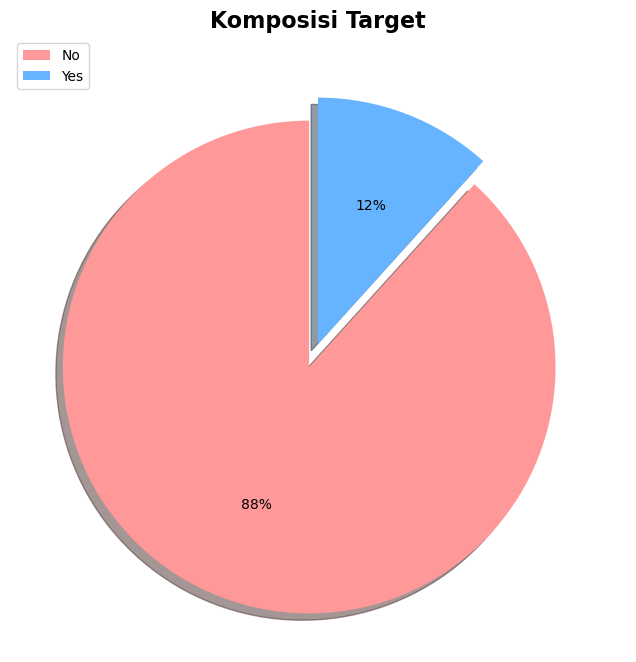

In [17]:
plt.figure(figsize=(8, 8))

# Data
target_counts = df['y'].value_counts()

# Mengatur variasi warna dan efek shadow
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Pie chart
plt.pie(target_counts, autopct='%1.0f%%', startangle=90, explode=explode, colors=colors, shadow=True)

# Pengaturan lainnya
plt.title('Komposisi Target', fontsize=16, fontweight='bold')
plt.legend(labels=['No', 'Yes'], loc='upper left')

plt.show()

### Numerical

<Figure size 640x480 with 0 Axes>

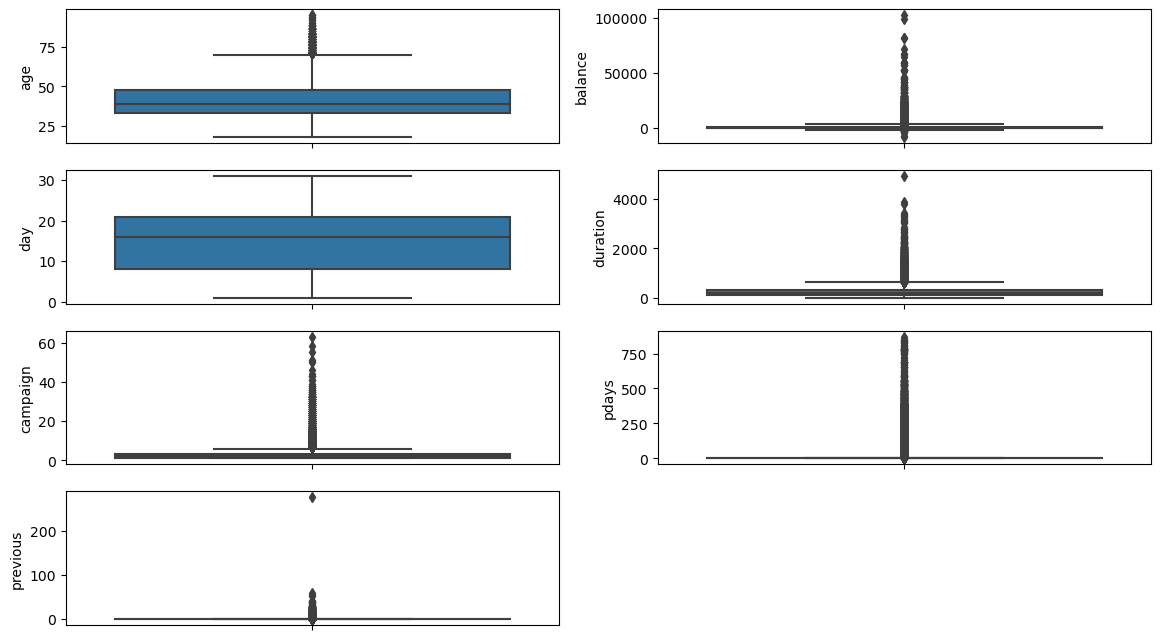

In [18]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(14, 8)) 
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
plt.show()

<Figure size 640x480 with 0 Axes>

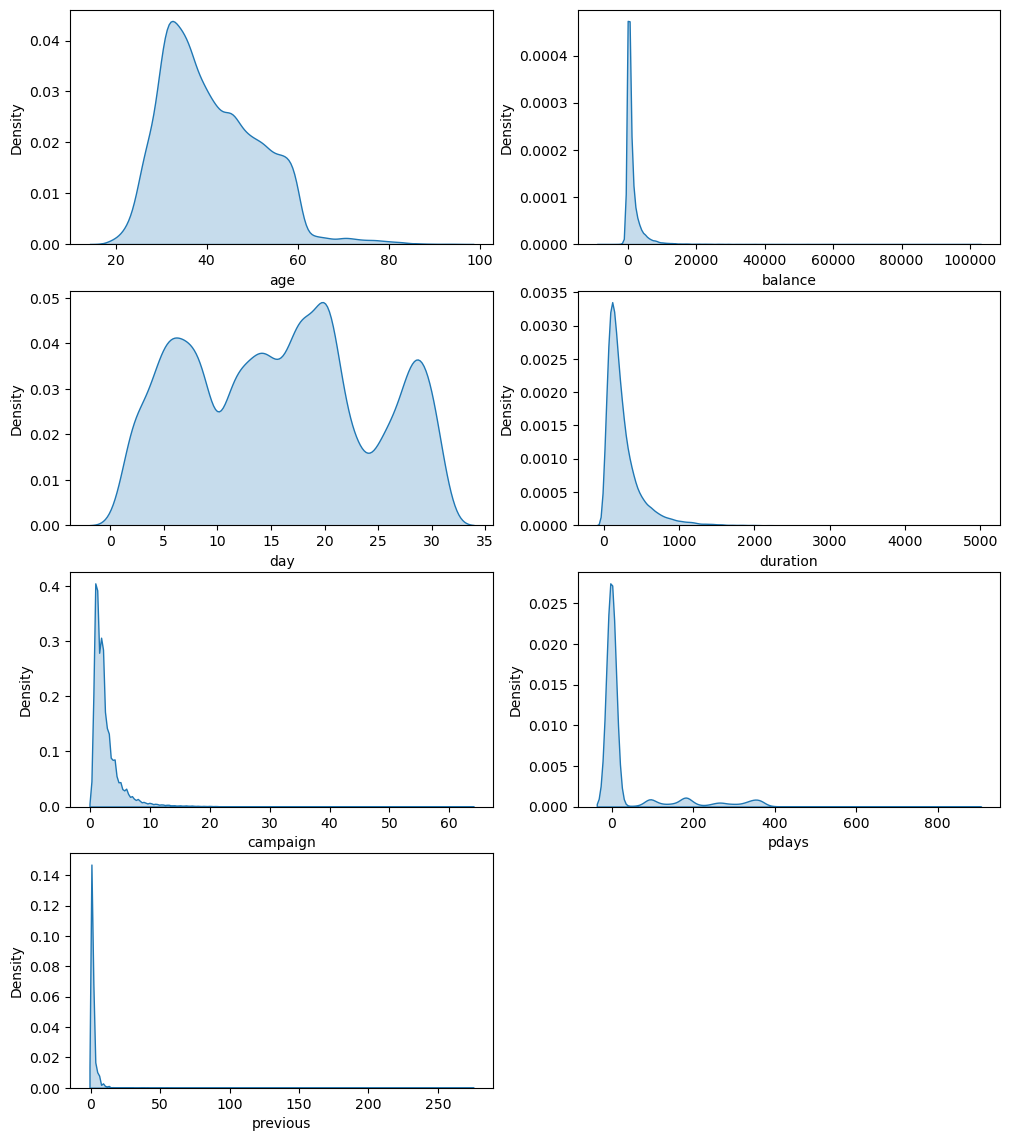

In [19]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(12, 14)) 
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(data=df[col], shade=True)
    plt.xlabel(col)
plt.show()

In [20]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(num_cols)):
    print(f"Skewness {df[num_cols].columns[i]} : {df[num_cols[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


### Categorical

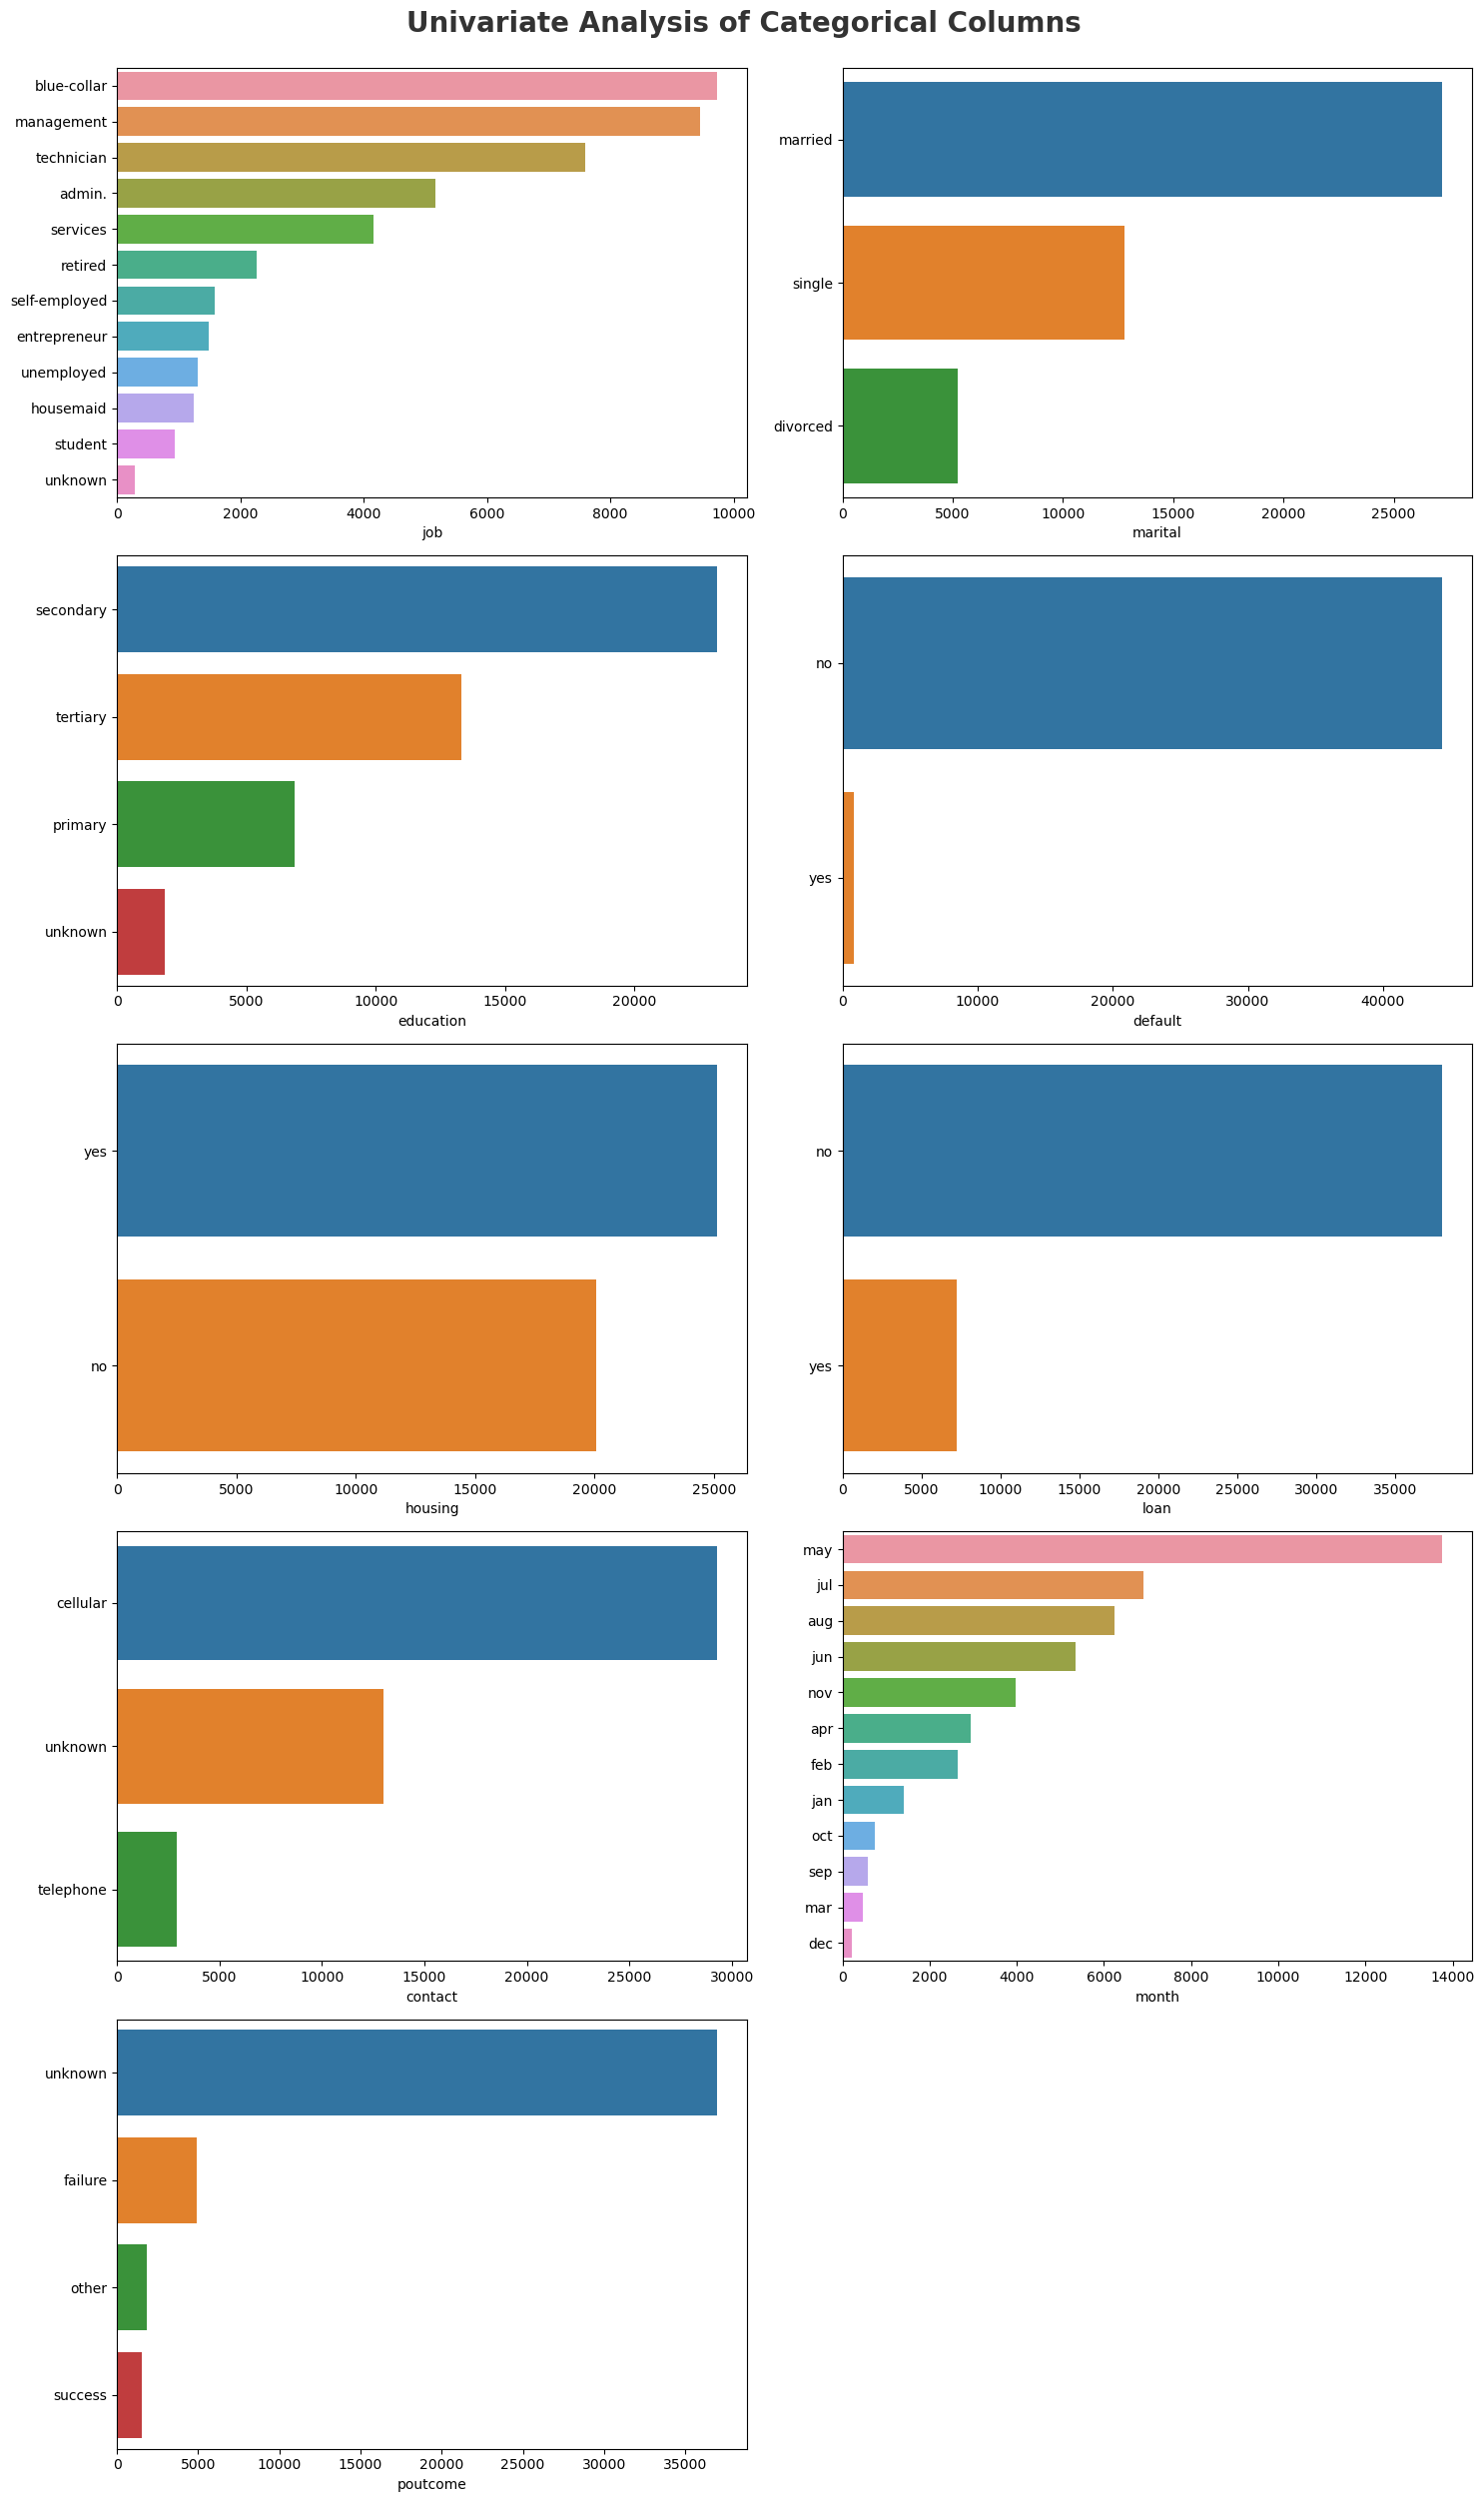

In [21]:
plt.figure(figsize=(15, 25))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_cols)):
    if cat_cols[i] != 'y':
        plt.subplot(5, 2, i+1)
        sns.barplot(y=df[cat_cols[i]].value_counts().index, x=df[cat_cols[i]].value_counts(), orient='horizontal')

plt.tight_layout()
plt.show()

## Bivariate Analysis

#### Demographics

- Demographics:  
age: Age of the client (numeric).  
job: Type of job (categorical): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".  
marital: Marital status (categorical): "married", "divorced", "single" (Note: "divorced" means divorced or widowed).  
education: Education level (categorical): "unknown", "secondary", "primary", "tertiary".  
default: Has credit in default? (binary): "yes", "no".  
balance: Average yearly balance in euros (numeric).  

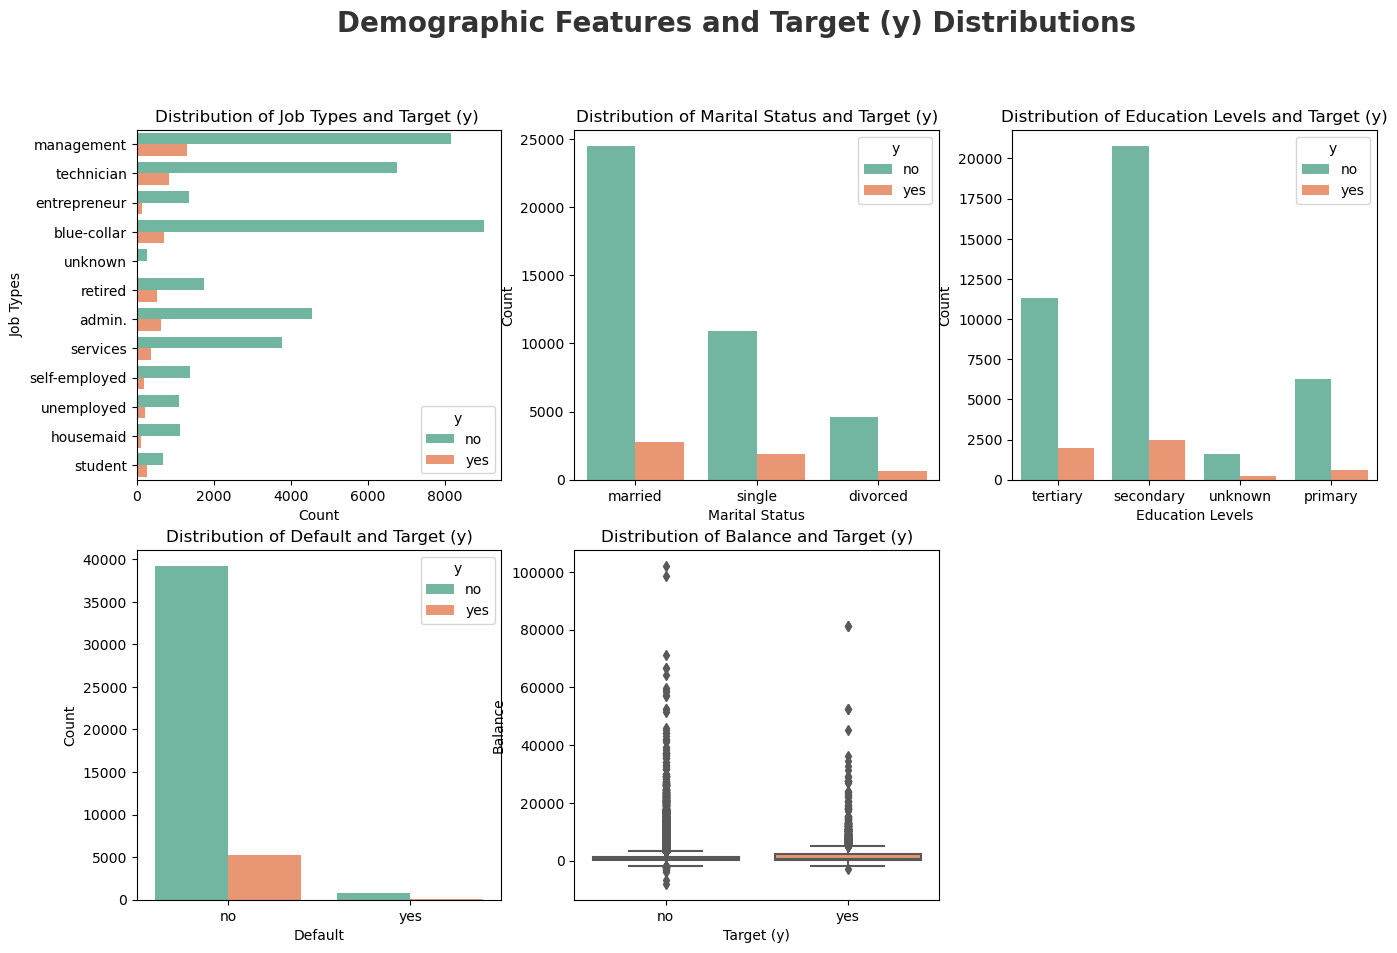

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
plt.suptitle('Demographic Features and Target (y) Distributions', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Visualisasi job terhadap target
sns.countplot(y='job', hue='y', data=df, ax=axes[0, 0], orient='h', palette='Set2')
axes[0, 0].set_title('Distribution of Job Types and Target (y) ')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Job Types')

# Visualisasi marital status terhadap target
sns.countplot(x='marital', hue='y', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Distribution of Marital Status and Target (y)')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Count')

# Visualisasi education level terhadap target
sns.countplot(x='education', hue='y', data=df, ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Distribution of Education Levels and Target (y)')
axes[0, 2].set_xlabel('Education Levels')
axes[0, 2].set_ylabel('Count')

# Visualisasi default terhadap target
sns.countplot(x='default', hue='y', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Distribution of Default and Target (y)')
axes[1, 0].set_xlabel('Default')
axes[1, 0].set_ylabel('Count')

# Visualisasi balance terhadap target
sns.boxplot(x='y', y='balance', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Distribution of Balance and Target (y)')
axes[1, 1].set_xlabel('Target (y)')
axes[1, 1].set_ylabel('Balance')

# Menyembunyikan subplot yang tidak terpakai
for i in range(1, 2):
    for j in range(2, 3):
        axes[i, j].axis('off')
plt.show()

#### Housing and Loan Information

- Housing and Loan Information:  
housing: Has a housing loan? (binary): "yes", "no".  
loan: Has a personal loan? (binary): "yes", "no".  

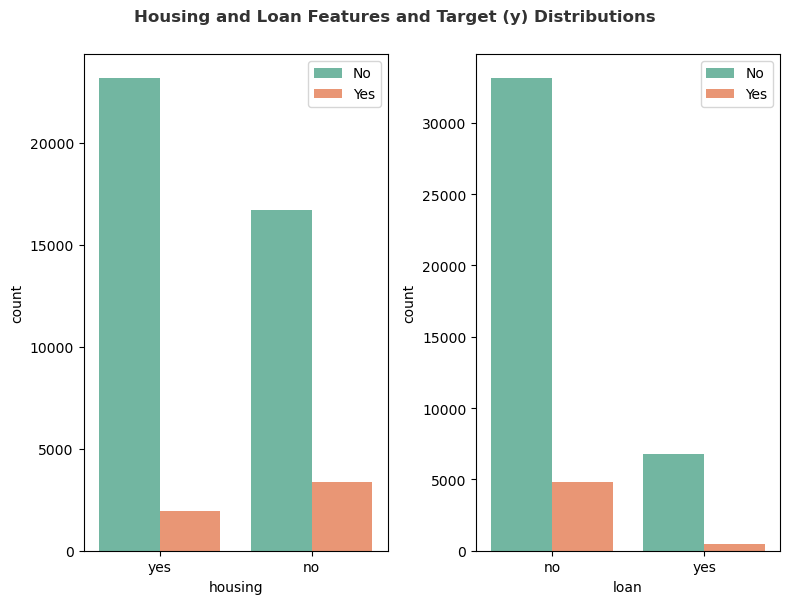

In [23]:
housing_loan = ['housing', 'loan']
plt.figure(figsize=(8, 6))
plt.suptitle('Housing and Loan Features and Target (y) Distributions', fontsize=12, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(housing_loan)):
    plt.subplot(1, 2, i+1)
    sorted_vals = df[housing_loan[i]].value_counts().index
    sns.countplot(x=df[housing_loan[i]], hue=df['y'], order=sorted_vals, palette='Set2')
    plt.legend(['No', 'Yes'])

plt.tight_layout()
plt.show()

#### Contact Information

- Contact Information:  
contact: Contact communication type (categorical): "unknown", "telephone", "cellular".  
day: Last contact day of the month (numeric).  
month: Last contact month of the year (categorical).  
duration: Last contact duration in seconds (numeric).  

In [44]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

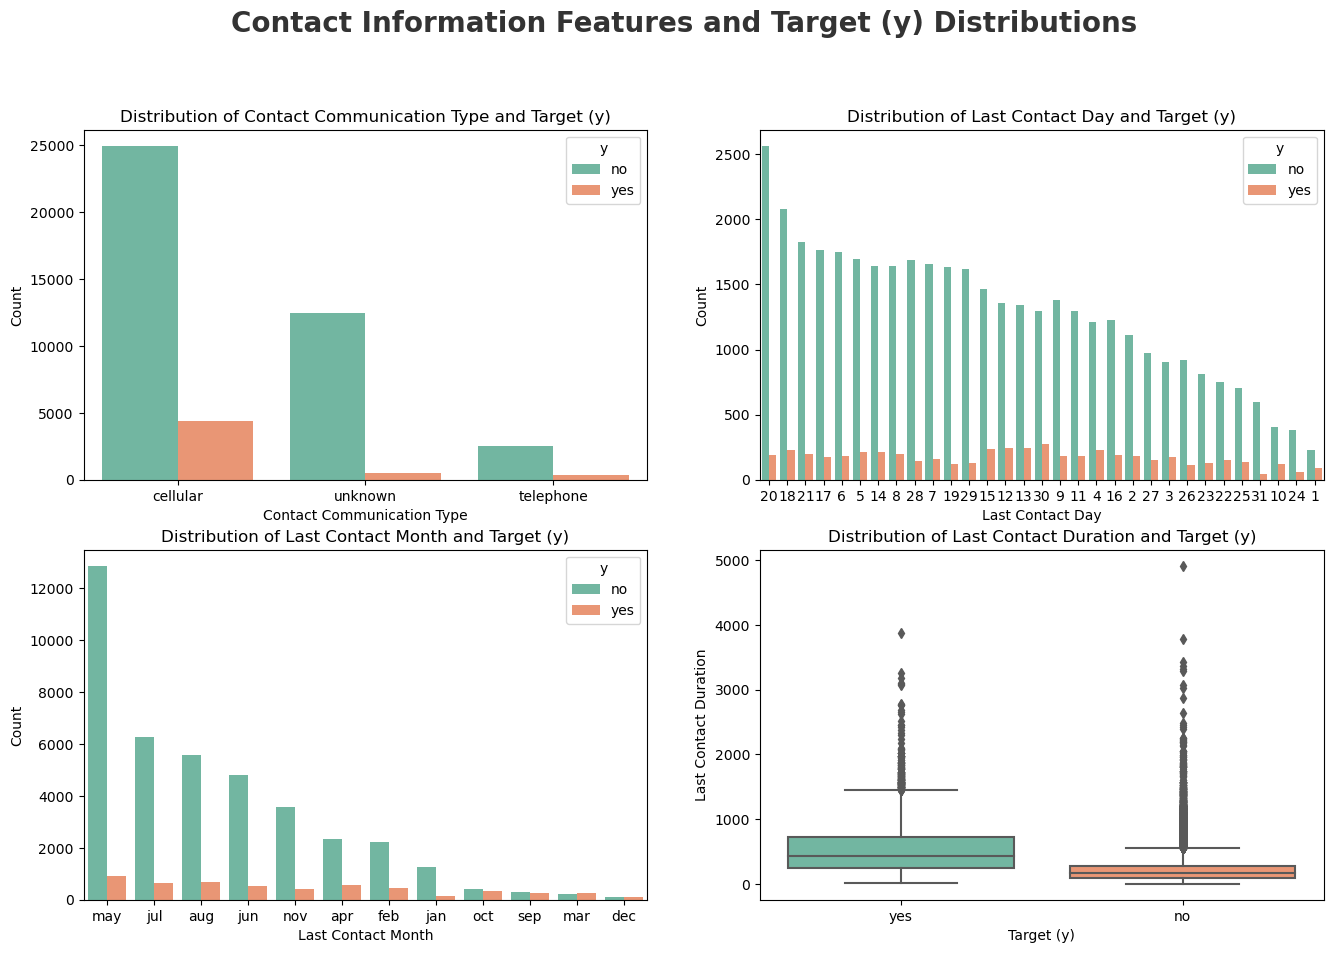

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misalkan 'contact', 'day', dan 'month' adalah kolom kategorikal, dan 'duration' adalah kolom numerik.
# Ganti dengan kolom sesuai dataset Anda.

# Urutkan 'contact' berdasarkan jumlah terbanyak
contact_order = df['contact'].value_counts().index

# Urutkan 'day' berdasarkan jumlah terbanyak
day_order = df['day'].value_counts().index

# Urutkan 'month' berdasarkan jumlah terbanyak
month_order = df['month'].value_counts().index

# Urutkan 'duration' berdasarkan median terbesar
duration_order = df.groupby('y')['duration'].median().sort_values(ascending=False).index

# Buat subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Visualisasi contact communication type terhadap target
sns.countplot(x='contact', hue='y', data=df, ax=axes[0, 0], palette='Set2', order=contact_order)
axes[0, 0].set_title('Distribution of Contact Communication Type and Target (y)')
axes[0, 0].set_xlabel('Contact Communication Type')
axes[0, 0].set_ylabel('Count')

# Visualisasi last contact day terhadap target
sns.countplot(x='day', hue='y', data=df, ax=axes[0, 1], palette='Set2', order=day_order)
axes[0, 1].set_title('Distribution of Last Contact Day and Target (y)')
axes[0, 1].set_xlabel('Last Contact Day')
axes[0, 1].set_ylabel('Count')

# Visualisasi last contact month terhadap target
sns.countplot(x='month', hue='y', data=df, ax=axes[1, 0], palette='Set2', order=month_order)
axes[1, 0].set_title('Distribution of Last Contact Month and Target (y)')
axes[1, 0].set_xlabel('Last Contact Month')
axes[1, 0].set_ylabel('Count')

# Visualisasi last contact duration terhadap target
sns.boxplot(x='y', y='duration', data=df, ax=axes[1, 1], palette='Set2', order=duration_order)
axes[1, 1].set_title('Distribution of Last Contact Duration and Target (y)')
axes[1, 1].set_xlabel('Target (y)')
axes[1, 1].set_ylabel('Last Contact Duration')

# Menambahkan suptitle
plt.suptitle('Contact Information Features and Target (y) Distributions', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.show()

#### Campaign History

- Campaign History:  
campaign: Number of contacts performed during this campaign and for this client (numeric, includes the last contact).  
pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted).  
previous: Number of contacts performed before this campaign and for this client (numeric).  
poutcome: Outcome of the previous marketing campaign (categorical): "unknown", "other", "failure", "success". 

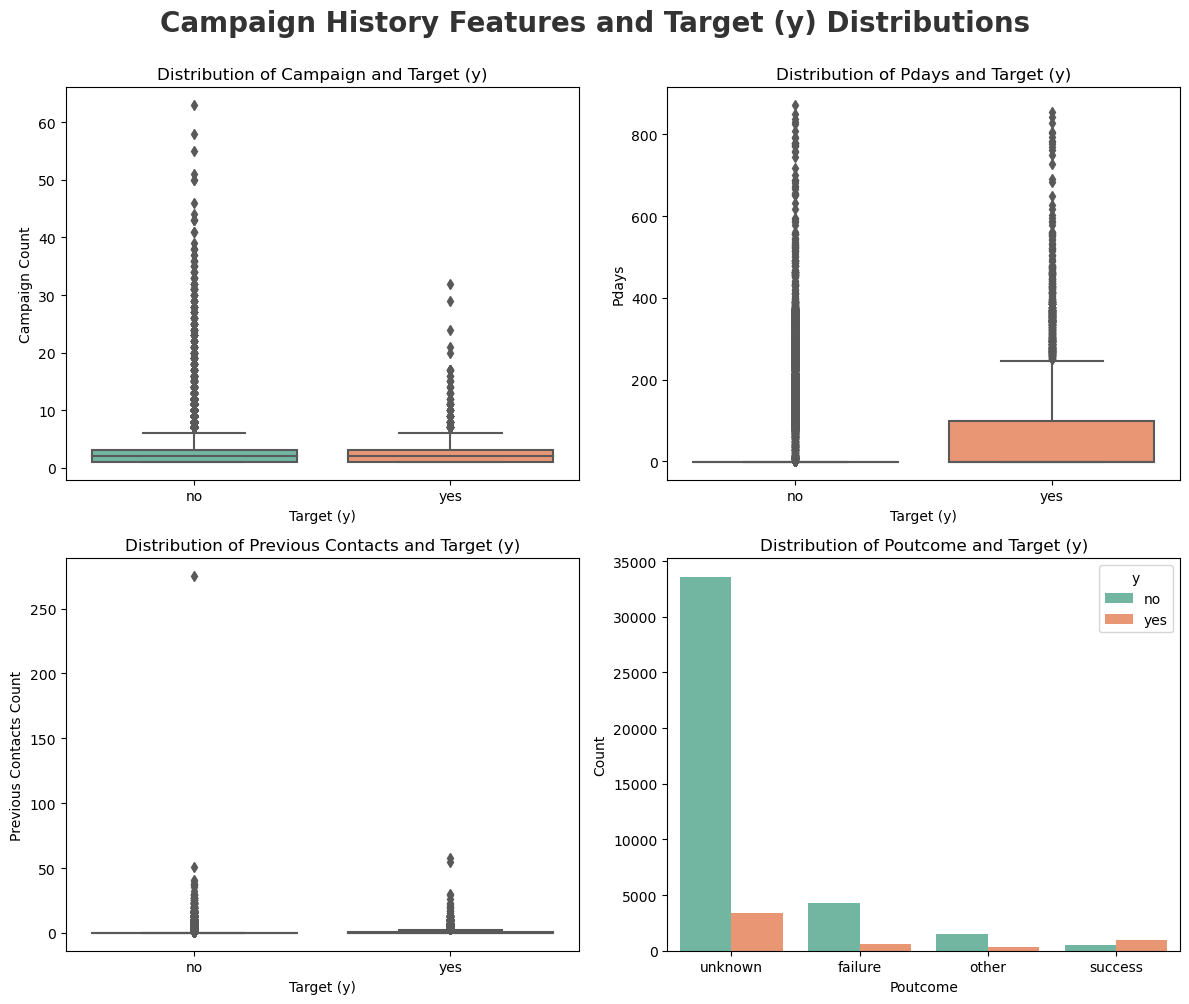

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Visualisasi campaign terhadap target menggunakan boxplot
sns.boxplot(x='y', y='campaign', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribution of Campaign and Target (y)')
axes[0, 0].set_xlabel('Target (y)')
axes[0, 0].set_ylabel('Campaign Count')

# Visualisasi pdays terhadap target
sns.boxplot(x='y', y='pdays', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Distribution of Pdays and Target (y)')
axes[0, 1].set_xlabel('Target (y)')
axes[0, 1].set_ylabel('Pdays')

# Visualisasi previous terhadap target menggunakan boxplot
sns.boxplot(x='y', y='previous', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Distribution of Previous Contacts and Target (y)')
axes[1, 0].set_xlabel('Target (y)')
axes[1, 0].set_ylabel('Previous Contacts Count')

# Visualisasi poutcome terhadap target
sns.countplot(x='poutcome', hue='y', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Distribution of Poutcome and Target (y)')
axes[1, 1].set_xlabel('Poutcome')
axes[1, 1].set_ylabel('Count')

# Menambahkan suptitle
plt.suptitle('Campaign History Features and Target (y) Distributions', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

plt.tight_layout()
plt.show()

In [27]:
df_eda = df.copy()

Bagaimana distribusi langganan deposito berjangka (y) bila kita mempertimbangkan kombinasi jenis pekerjaan (job) dan tingkat pendidikan (education)?

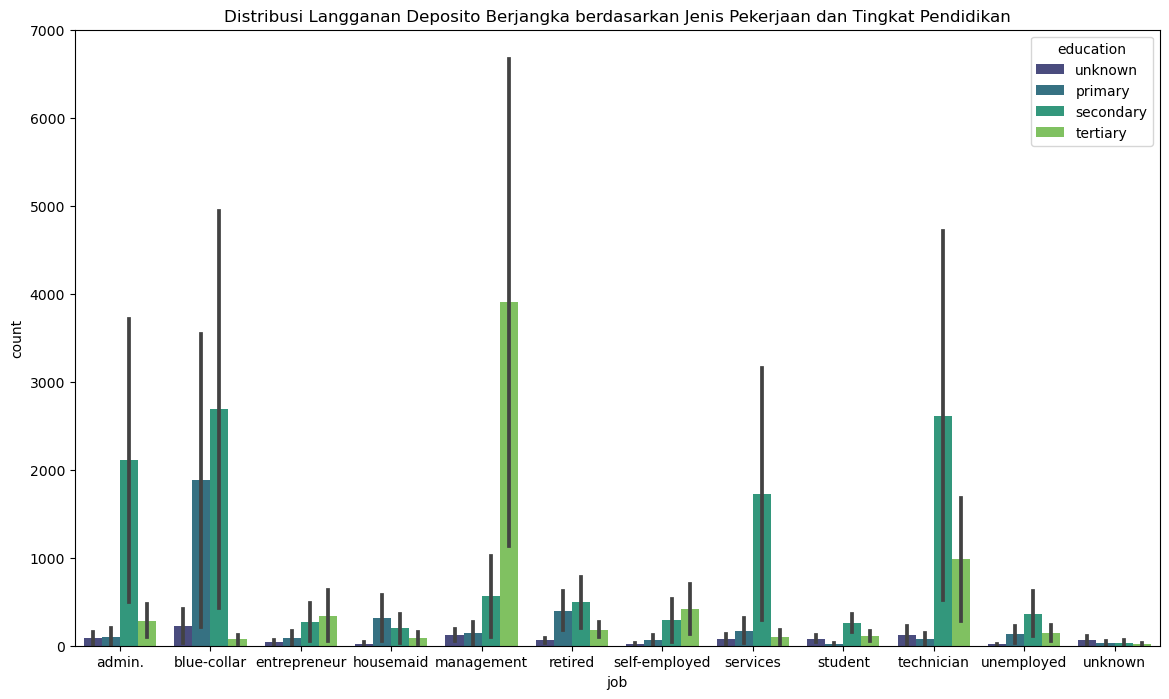

In [28]:
grouped_data_job_education = df_eda.groupby(['job', 'education', 'y']).size().reset_index(name='count')

# Membuat plot barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='job', y='count', hue='education', hue_order=['unknown', 'primary', 'secondary', 'tertiary'], palette='viridis', dodge=True, data=grouped_data_job_education)
plt.title('Distribusi Langganan Deposito Berjangka berdasarkan Jenis Pekerjaan dan Tingkat Pendidikan')
plt.show()

- Variasi Distribusi Langganan:
Distribusi langganan deposito berjangka bervariasi tergantung pada kombinasi jenis pekerjaan dan tingkat pendidikan.
Beberapa jenis pekerjaan memiliki proporsi langganan yang lebih tinggi daripada yang lain.

- Pengaruh Tingkat Pendidikan:
Tingkat pendidikan memainkan peran penting dalam distribusi langganan. Sebagian besar pelanggan memiliki tingkat pendidikan 'secondary' atau 'tertiary'.
Beberapa jenis pekerjaan menunjukkan variasi yang signifikan dalam distribusi langganan tergantung pada tingkat pendidikan.

- Perilaku Pekerjaan Spesifik:
Pekerjaan seperti 'management' dan 'technician' menunjukkan variasi yang signifikan dalam jumlah langganan dan tidak langganan tergantung pada tingkat pendidikan.
Pekerjaan 'blue-collar' dan 'services' juga menunjukkan variasi yang cukup besar dalam distribusi langganan.

- Pekerjaan dengan Jumlah Langganan Tinggi:
Pekerjaan seperti 'retired' dan 'student' cenderung memiliki jumlah langganan yang lebih tinggi, terutama di antara pelanggan dengan tingkat pendidikan 'tertiary'.

Apakah pola langganan deposito berjangka (y) berbeda untuk kombinasi status perkawinan (marital) dan memiliki pinjaman rumah (housing)?

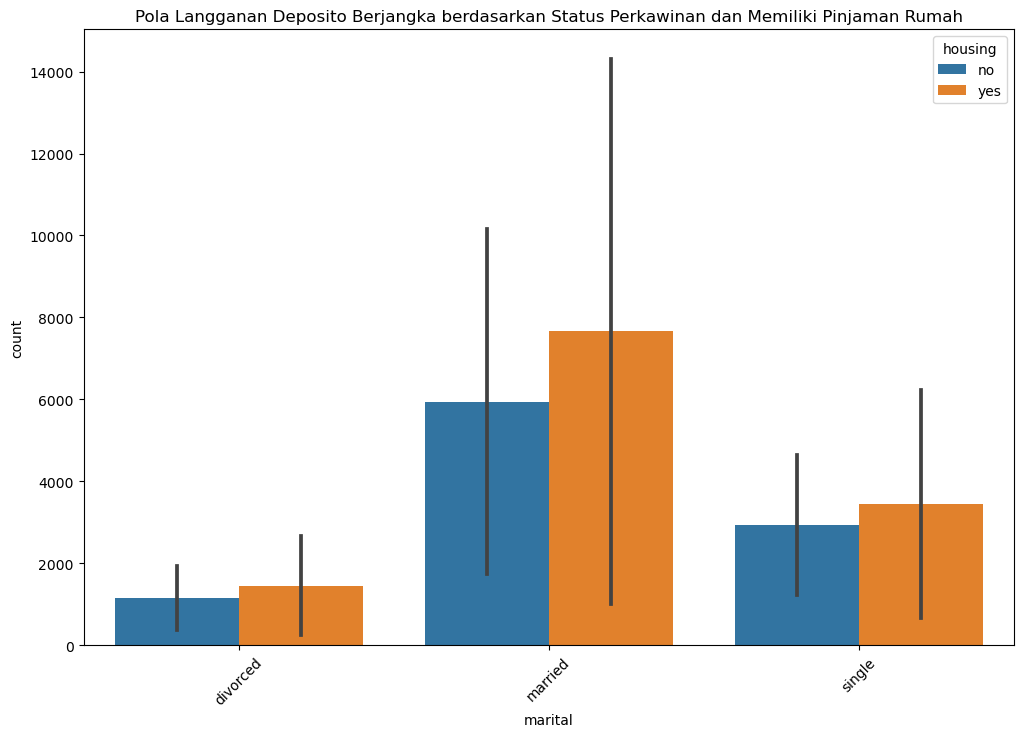

In [29]:
grouped_data_marital_housing = df_eda.groupby(['marital', 'housing', 'y']).size().reset_index(name='count')

# Membuat plot barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='marital', y='count', hue='housing', data=grouped_data_marital_housing)
plt.xticks(rotation=45)
plt.title('Pola Langganan Deposito Berjangka berdasarkan Status Perkawinan dan Memiliki Pinjaman Rumah')
plt.show()

- Perbedaan Berdasarkan Status Perkawinan:
Anda dapat melihat bagaimana pola langganan deposito berjangka (y) bervariasi untuk setiap status perkawinan (divorced, married, single).
Contohnya, jumlah pelanggan yang berlangganan dan tidak berlangganan dapat dibandingkan untuk setiap status perkawinan.

- Pengaruh Kepemilikan Rumah:
Distribusi langganan deposito berjangka juga dianalisis berdasarkan kepemilikan rumah ('no' atau 'yes').
Anda dapat melihat bagaimana pola langganan berubah tergantung pada apakah pelanggan memiliki atau tidak memiliki rumah.

- Kombinasi Status Perkawinan dan Kepemilikan Rumah:
Tabel mencakup kombinasi status perkawinan, kepemilikan rumah, dan hasil langganan deposito berjangka.
Ini memberikan pandangan yang lengkap tentang pola langganan untuk setiap kelompok kombinasi.

Apakah hubungan antara saldo tahunan rata-rata (balance) dan durasi kontak terakhir (duration) bervariasi tergantung pada apakah klien berlangganan atau tidak berlangganan deposito berjangka (y)?

In [30]:
balance_duration_by_y = df_eda.groupby('y')[['balance', 'duration']].describe().reset_index()

# Menampilkan hasil
print(balance_duration_by_y)

     y  balance                                                          \
          count         mean          std     min    25%    50%     75%   
0   no  39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0   
1  yes   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   

            duration                                                            
        max    count        mean         std  min    25%    50%    75%     max  
0  102127.0  39922.0  221.182806  207.383237  0.0   95.0  164.0  279.0  4918.0  
1   81204.0   5289.0  537.294574  392.525262  8.0  244.0  426.0  725.0  3881.0  


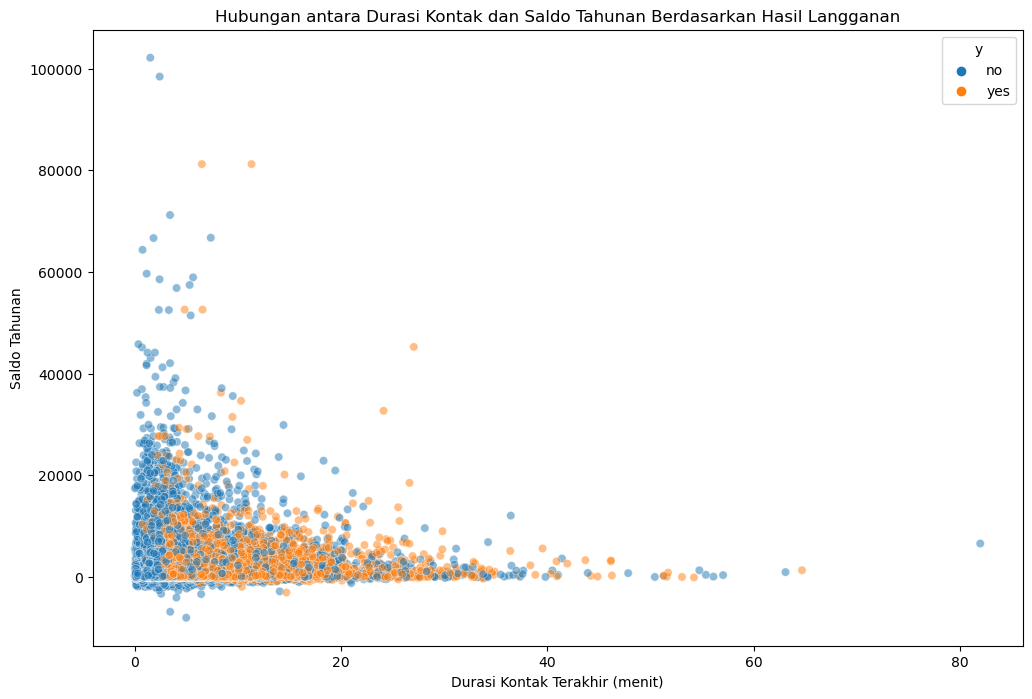

In [31]:
# Mengubah durasi kontak dari detik ke menit
df_eda['duration_minutes'] = df_eda['duration'] / 60

# Membuat scatter plot dalam menit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='duration_minutes', y='balance', hue='y', data=df_eda, alpha=0.5)
plt.xlabel('Durasi Kontak Terakhir (menit)')
plt.ylabel('Saldo Tahunan')
plt.title('Hubungan antara Durasi Kontak dan Saldo Tahunan Berdasarkan Hasil Langganan')
plt.show()


Klien yang berlangganan deposito berjangka memiliki rata-rata saldo tahunan yang lebih tinggi (€1,804.27) dibandingkan dengan klien yang tidak berlangganan (€1,303.71).  
Rata-rata durasi kontak terakhir lebih tinggi untuk klien yang berlangganan deposito berjangka (8.95 menit) dibandingkan dengan klien yang tidak berlangganan (3.69 menit).  

Bagaimana distribusi umur (age) memengaruhi keputusan langganan deposito berjangka (y) bila kita mempertimbangkan hasil kampanye pemasaran sebelumnya (poutcome)?

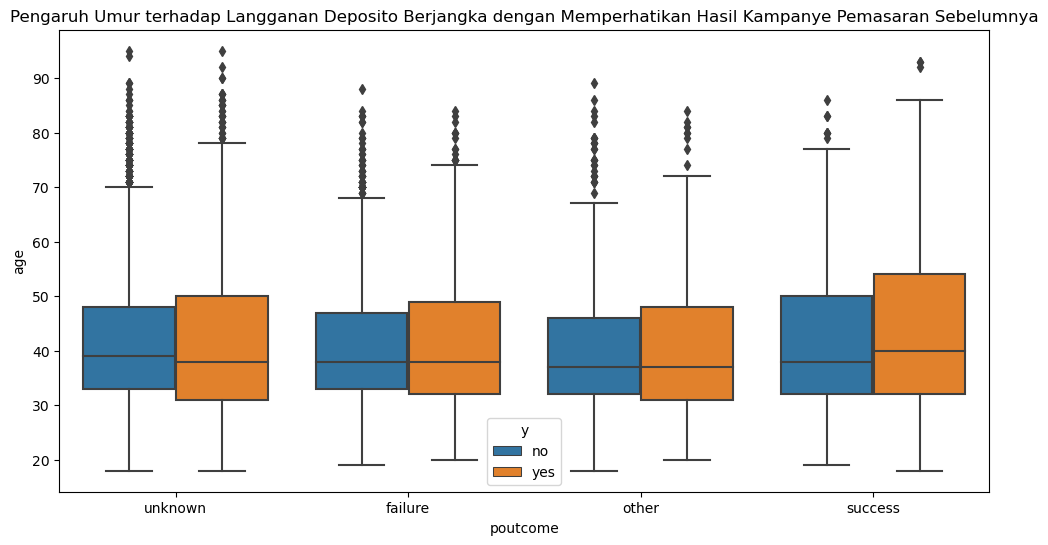

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='poutcome', y='age', hue='y', data=df_eda)
plt.title('Pengaruh Umur terhadap Langganan Deposito Berjangka dengan Memperhatikan Hasil Kampanye Pemasaran Sebelumnya')
plt.show()

Apakah keputusan langganan deposito berjangka (y) bervariasi tergantung pada bulan terakhir kontak, dengan mempertimbangkan jenis komunikasi kontak (contact)?

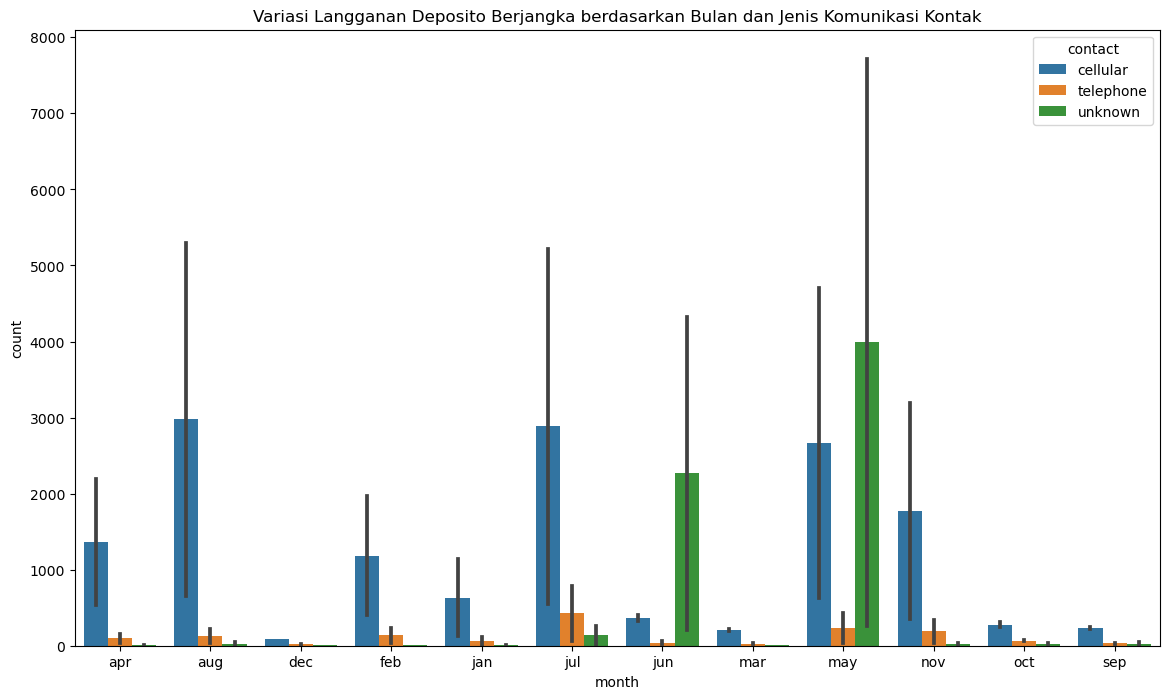

In [33]:
# Menggunakan groupby untuk menghitung jumlah langganan dan tidak langganan berdasarkan bulan, jenis komunikasi, dan hasil langganan
grouped_data_month_contact = df_eda.groupby(['month', 'contact', 'y']).size().reset_index(name='count')

# Membuat plot barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='count', hue='contact', data=grouped_data_month_contact)
plt.title('Variasi Langganan Deposito Berjangka berdasarkan Bulan dan Jenis Komunikasi Kontak')
plt.show()

- Bulan Terakhir Kontak (Month):
Langganan deposito berjangka cenderung bervariasi pada setiap bulan.
Bulan-bulan seperti 'mar', 'dec', 'oct', dan 'sep' memiliki kecenderungan untuk memiliki tingkat langganan yang lebih tinggi.

- Jenis Komunikasi Kontak (Contact):
Mayoritas langganan deposito berjangka dilakukan melalui komunikasi seluler ('cellular').
Komunikasi seluler dan telepon memiliki tingkat langganan yang signifikan, sedangkan komunikasi dengan status 'unknown' cenderung memiliki tingkat langganan yang lebih rendah.

- Interaksi Bulan dan Jenis Komunikasi:
Sebagian besar bulan memiliki tingkat langganan tertinggi melalui komunikasi seluler, kecuali bulan 'mar' yang memiliki tingkat langganan tertinggi melalui komunikasi telepon.

Apa pekerjaan atau kelompok pekerjaan yang cenderung berlangganan deposito berjangka? Bagaimana informasi ini dapat membantu dalam menyusun strategi pemasaran yang lebih terarah?

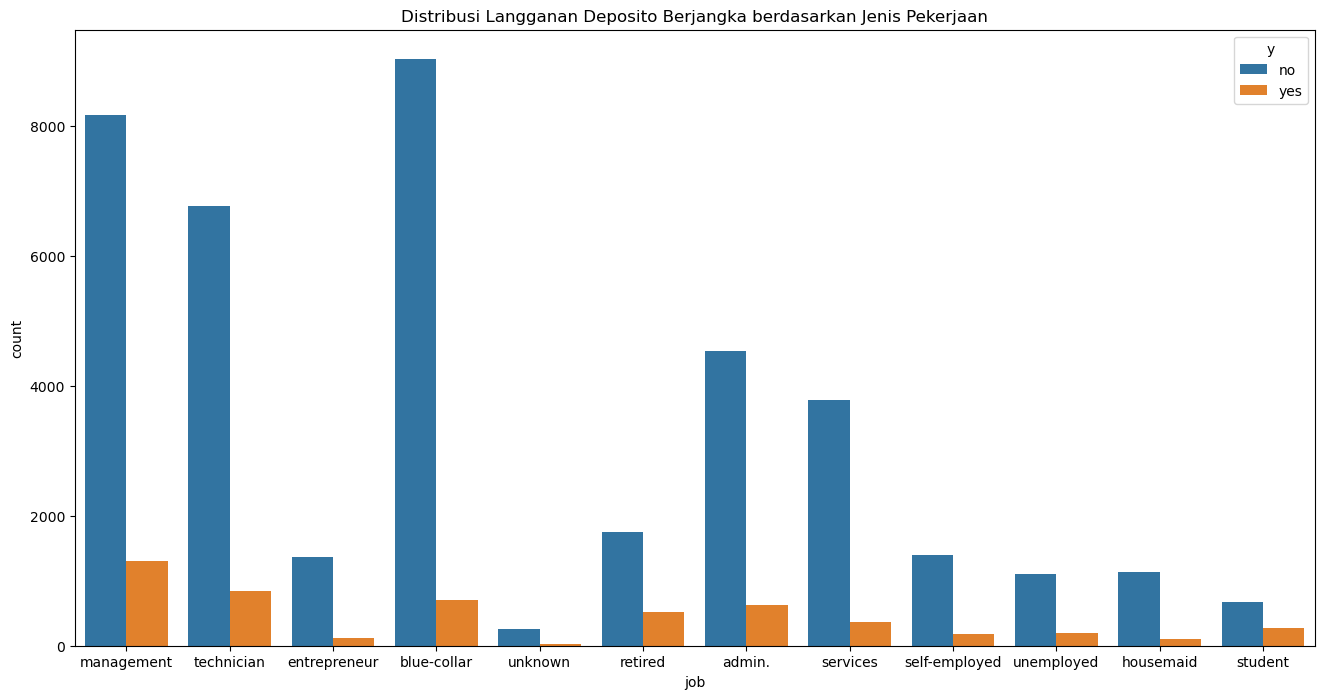

In [34]:
plt.figure(figsize=(16, 8))
sns.countplot(x='job', hue='y', data=df_eda)
plt.title('Distribusi Langganan Deposito Berjangka berdasarkan Jenis Pekerjaan')
plt.show()

Bagaimana pengaruh hasil kampanye pemasaran sebelumnya terhadap keputusan pelanggan untuk berlangganan deposito berjangka? Bagaimana kita dapat meningkatkan hasil kampanye pemasaran di masa mendatang?

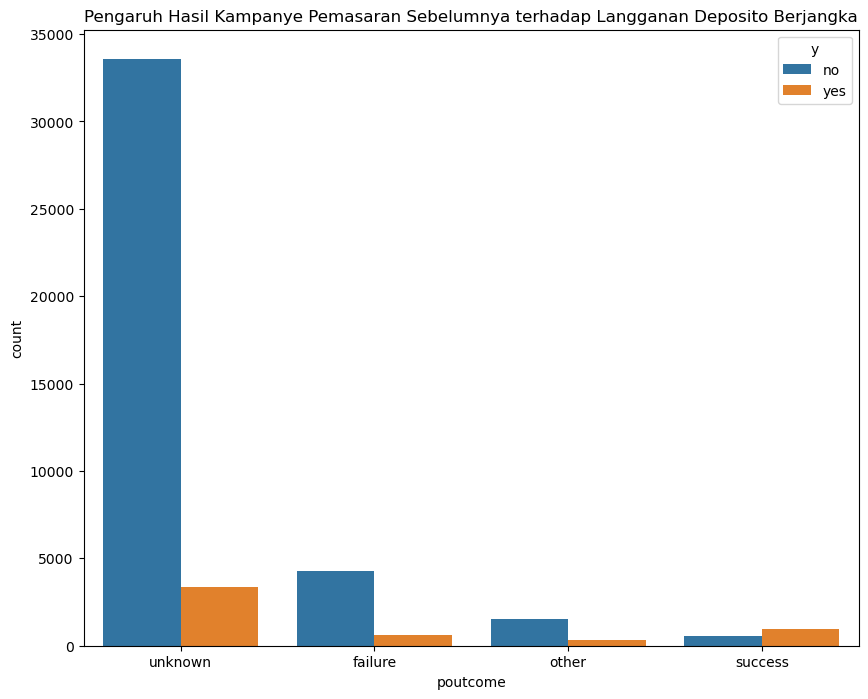

In [35]:
poutcome_order = ['unknown', 'failure', 'other', 'success']
plt.figure(figsize=(10, 8))
sns.countplot(x='poutcome', hue='y', data=df_eda, order=poutcome_order)
plt.title('Pengaruh Hasil Kampanye Pemasaran Sebelumnya terhadap Langganan Deposito Berjangka')
plt.show()

bagaimana distribusi umur pelanggan yang berlangganan dan tidak berlangganan deposito berjangka?

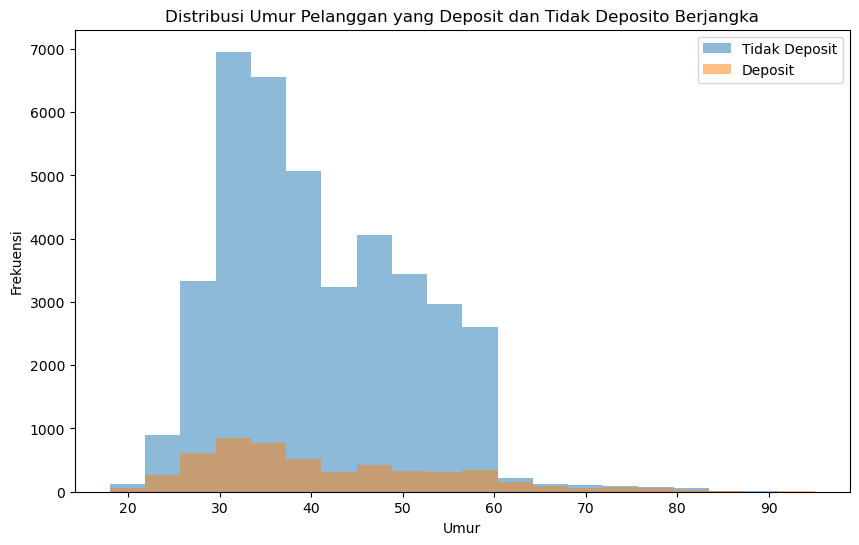

In [36]:
plt.figure(figsize=(10, 6))
age_by_y = df_eda.groupby('y')['age'].plot(kind='hist', alpha=0.5, legend=True, bins=20)
age_by_y
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Umur Pelanggan yang Deposit dan Tidak Deposito Berjangka')
plt.legend(labels=['Tidak Deposit', 'Deposit'])
plt.show()

Rata-rata umur pelanggan yang berlangganan dan tidak berlangganan deposito berjangka hampir serupa, tetapi pelanggan yang berlangganan memiliki standar deviasi yang lebih tinggi, menunjukkan distribusi umur yang lebih bervariasi.  
Median umur (50th percentile) pelanggan yang berlangganan lebih rendah dibandingkan dengan pelanggan yang tidak berlangganan, menunjukkan kecenderungan umur yang lebih muda di antara pelanggan yang berlangganan.  
Umur pelanggan berkisar dari 18 hingga 95 tahun, dan tidak ada perbedaan pada nilai maksimum umur antara kedua kelompok.  

Apakah terdapat tren atau pola tertentu dalam distribusi saldo tahunan rata-rata untuk pelanggan yang berlangganan deposito berjangka? Bagaimana informasi ini dapat digunakan untuk mengidentifikasi segmen pelanggan potensial?

In [37]:
avg_bal_y = df_eda.groupby('y')['balance'].mean().reset_index()

# Menampilkan hasil
avg_bal_y

,y,balance
0,no,1303.714969
1,yes,1804.267915


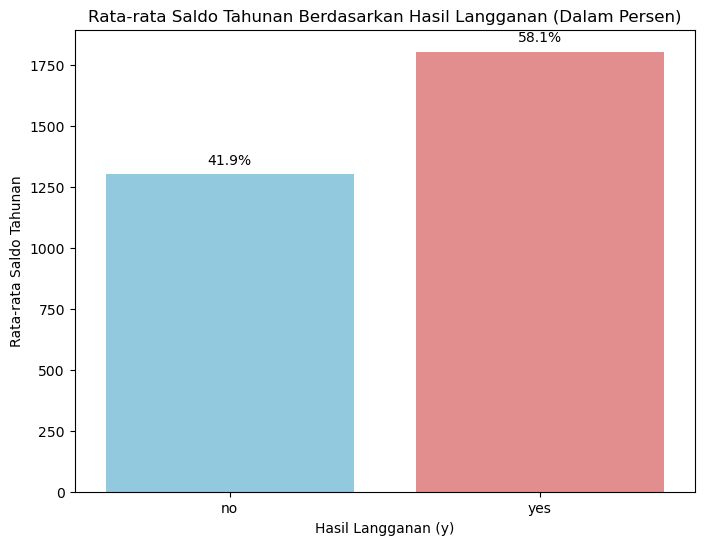

In [38]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='y', y='balance', data=avg_bal_y, palette=['skyblue', 'lightcoral'])

# Menambahkan nilai (dalam persen) pada tiap bar
total_height = sum([p.get_height() for p in ax.patches])
for p in ax.patches:
    percentage = (p.get_height() / total_height) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Hasil Langganan (y)')
plt.ylabel('Rata-rata Saldo Tahunan')
plt.title('Rata-rata Saldo Tahunan Berdasarkan Hasil Langganan (Dalam Persen)')
plt.show()

- Berdasarkan perbandingan rata-rata saldo tahunan, terlihat bahwa pelanggan yang berlangganan deposito berjangka cenderung memiliki rata-rata saldo tahunan yang lebih tinggi dibandingkan dengan pelanggan yang tidak berlangganan.
- Informasi ini dapat digunakan untuk mengidentifikasi segmen pelanggan potensial, yaitu mereka yang memiliki kecenderungan memiliki saldo tahunan yang lebih tinggi dan lebih mungkin berlangganan deposito berjangka.
- Strategi pemasaran yang lebih intensif atau penawaran khusus dapat ditargetkan pada segmen pelanggan ini untuk meningkatkan peluang mereka untuk berlangganan deposito berjangka

Bagaimana kombinasi memiliki pinjaman rumah dan memiliki pinjaman pribadi memengaruhi keputusan pelanggan untuk berlangganan deposito berjangka? Apakah ada strategi pemasaran yang dapat dikembangkan untuk menargetkan kelompok pelanggan ini dengan lebih efektif?

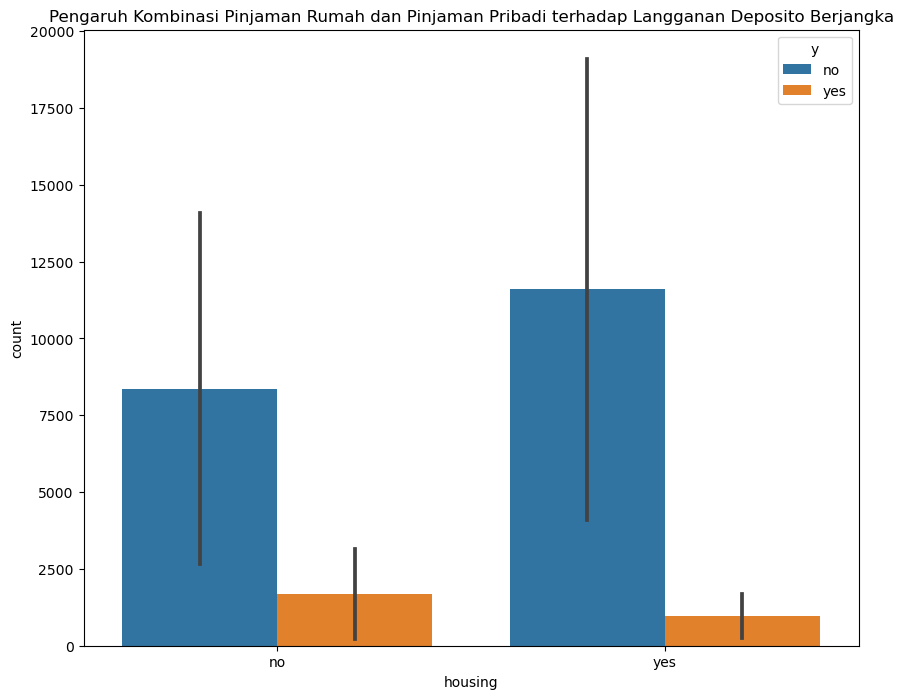

In [39]:
grouped_data_loan_combination = df_eda.groupby(['housing', 'loan', 'y']).size().reset_index(name='count')

# Membuat plot barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='housing', y='count', hue='y', data=grouped_data_loan_combination)
plt.title('Pengaruh Kombinasi Pinjaman Rumah dan Pinjaman Pribadi terhadap Langganan Deposito Berjangka')
plt.show()

## Multivariate Analysis

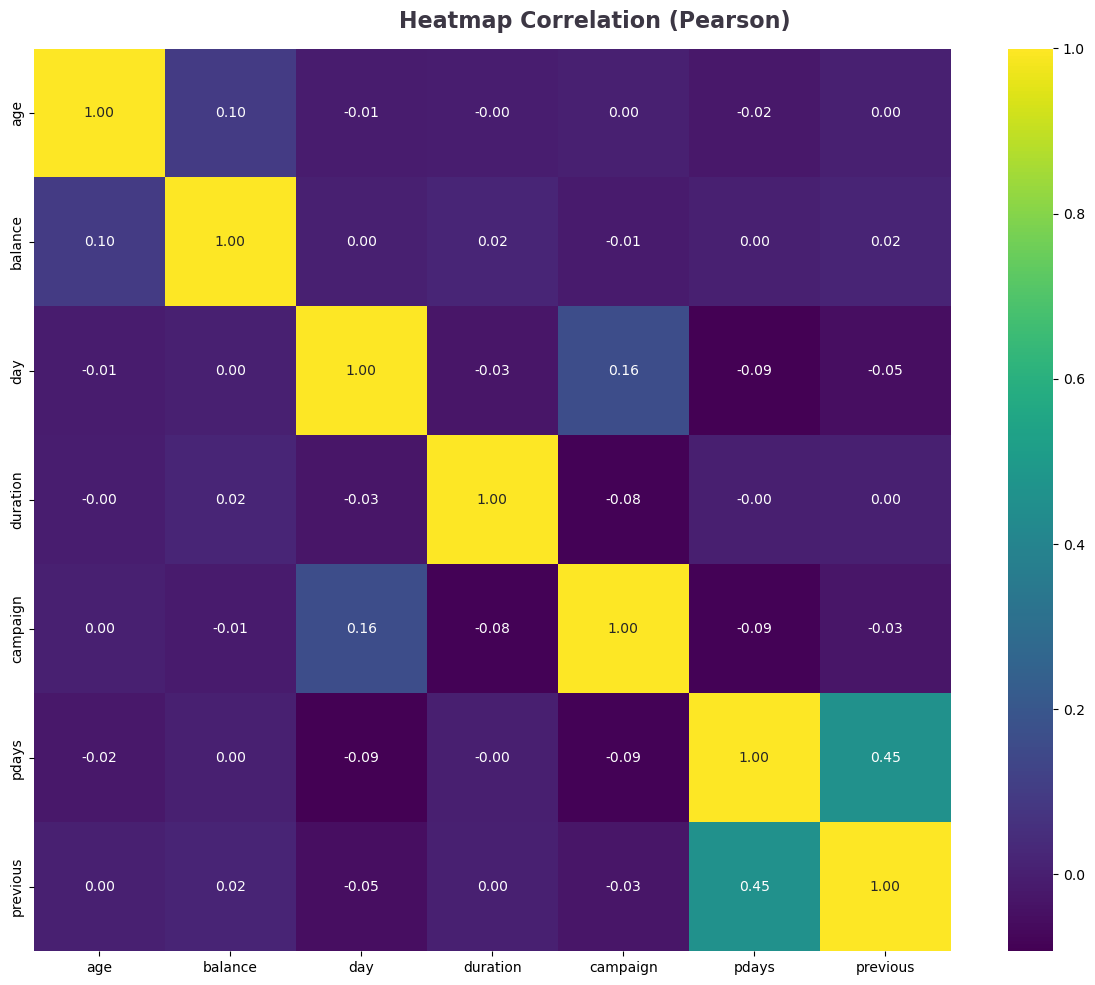

In [40]:
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation (Pearson)', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Tampilkan plot
plt.show()

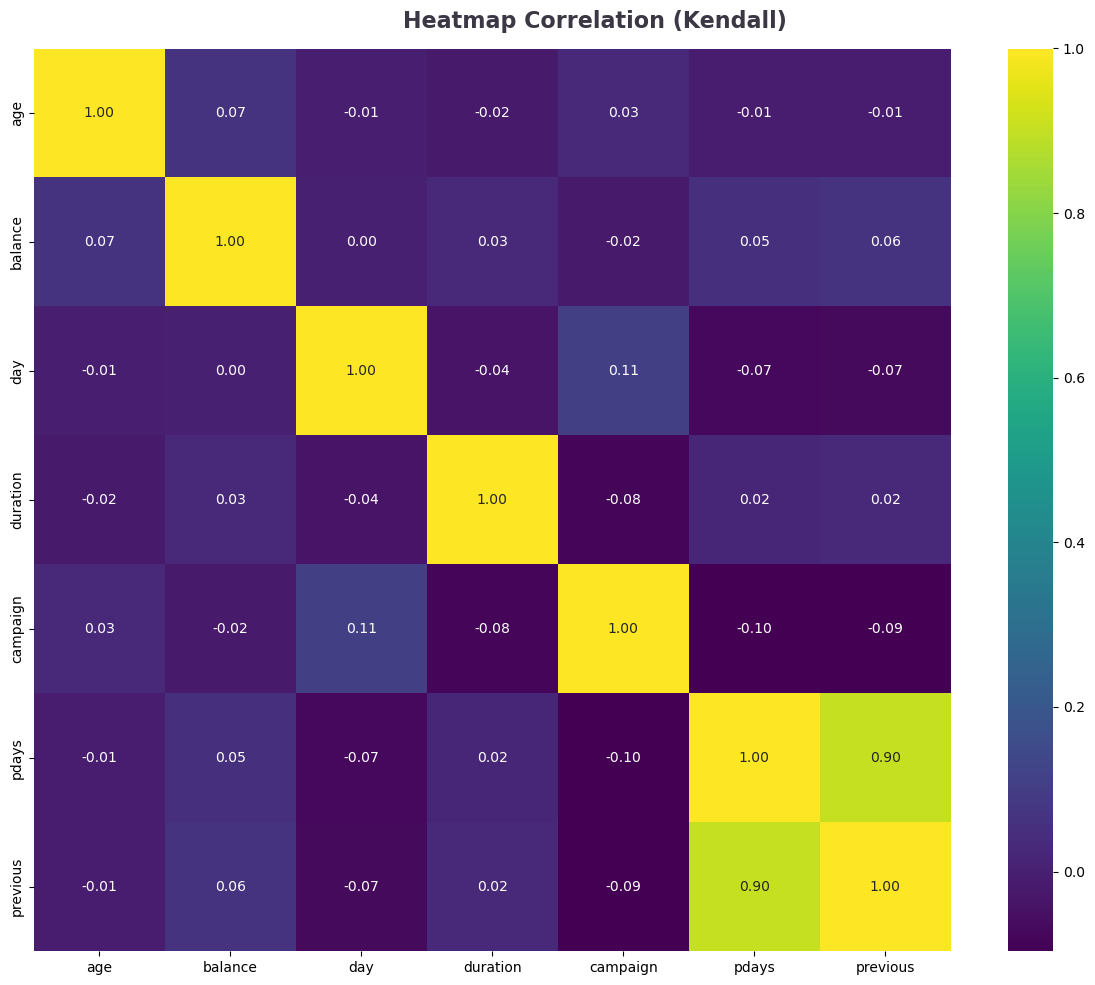

In [41]:
corr_matrix = df.corr(method='kendall')

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.suptitle('Heatmap Correlation (Kendall)', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()

# Tampilkan plot
plt.show()